<Figure size 800x600 with 0 Axes>

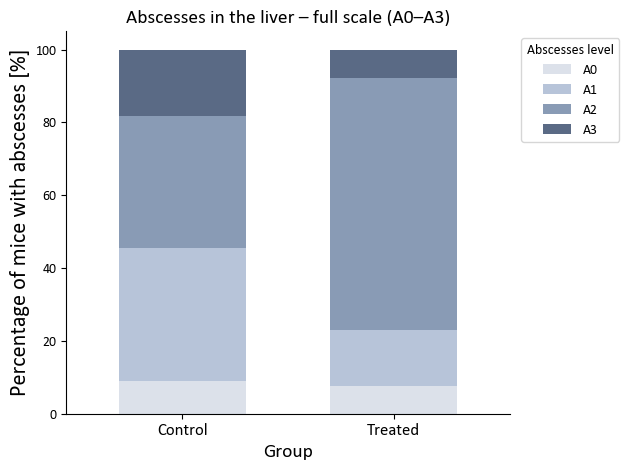

<Figure size 800x400 with 0 Axes>

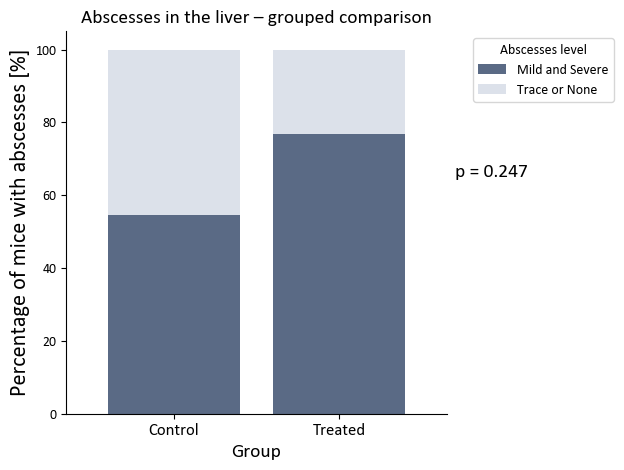

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read the input data
df = pd.read_excel('Infiltration vs Metastases_abscesses.xlsx')
plt.rcParams['font.family'] = 'Calibri'

# === PLOT 1: Full abscess categories (A0–A3) === #

# Define color palette for full 4-level classification
colors_full = ["#DCE1EA", "#B7C4D9", "#899BB5", "#5A6A85"]

# Create a contingency table: count mice per group and abscess severity level
abscesses_summary_full = df.groupby(['Group', 'Liver abscesses']).size().unstack(fill_value=0)

# Convert counts to percentages within each group
abscesses_summary_full = abscesses_summary_full.divide(abscesses_summary_full.sum(axis=1), axis=0) * 100

# Plot: stacked bar showing percentage of each severity level per group
plt.figure(figsize=(8, 6))
ax1 = abscesses_summary_full.plot(kind='bar', stacked=True, color=colors_full, width=0.6)

# Style the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylabel('Percentage of mice with abscesses [%]', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.title('Abscesses in the liver – full scale (A0–A3)', fontsize=14)
plt.legend(title='Abscesses level', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# === PLOT 2: Grouped categories (2 levels) with statistical test === #

# Make a copy of the data for transformation
df_filtered = df.copy()

# Reclassify abscess levels into 2 categories:
# A0 + A1 → "Trace or None", A2 + A3 → "Mild and Severe"
df_filtered['Abscesses Level'] = df_filtered['Liver abscesses'].replace({
    'A0': 'Trace or None',
    'A1': 'Trace or None',
    'A2': 'Mild and Severe',
    'A3': 'Mild and Severe'
})

# Create a contingency table for the grouped categories
abscesses_summary_grouped = df_filtered.groupby(['Group', 'Abscesses Level']).size().unstack(fill_value=0)

# Convert counts to percentages within each group
abscesses_summary_grouped = abscesses_summary_grouped.divide(abscesses_summary_grouped.sum(axis=1), axis=0) * 100

# Plot the grouped data
colors_grouped = ["#5A6A85", "#DCE1EA"]
plt.figure(figsize=(8, 4))
ax2 = abscesses_summary_grouped.plot(kind='bar', stacked=True, color=colors_grouped, width=0.8)

# Style the plot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Run Pearson Chi-square test on contingency table
contingency_table = pd.crosstab(df_filtered['Group'], df_filtered['Abscesses Level'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table, correction=False)

# Annotate p-value on the plot
plt.text(
    len(abscesses_summary_grouped) - 0.3,  # x-position
    max(abscesses_summary_grouped.sum(axis=1)) - 35,  # y-position
    f'p = {p_value:.3f}',
    fontsize=14,
    ha='left',
    color='black'
)

# Final labeling
plt.ylabel('Percentage of mice with abscesses [%]', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.title('Abscesses in the liver – grouped comparison', fontsize=14)
plt.legend(title='Abscesses level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
